<a href="https://colab.research.google.com/github/Estebanc0/ADA-Informes/blob/main/Informe_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import random
import numpy as np

In [37]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    return keys, p

# DECRIPCION DEL PROBLEMA

ENTRADA: una secuencia ordenada de forma creciente de n claves, donde cada clave k tiene una posivilidad p de ser buscada, ademas de claves ficticias d con probabilidad q de ser buscadas

SALIDA: Costo total de todas las búsquedas más pequeño posible ademas de la construccion de un arbol de busqueda optimo

Este problema es uno de optimizacion el cual busca hallar el valor máximo dentro de una función a partir de una variable, esto con tal de resolver un problema de la manera más óptima posible. En este caso conociendo los nodos del arbol y su probabilidad de ser buscados, se busca reducir el costo esperado.

# DESCRIPCION DEL ALGORITMO


# Recursivo
El algoritmo utiliza una función para calcular el costo del árbol de búsqueda binario óptimo:




1.   Comprueba casos base (un solo elemento o ninguno)

2.   utilizando una función propia obtiene la suma de los elementos del arreglo de freq desde i a j

1.   inicializa un valor mínimo

2.   uno por uno va considerando todos los elementos como raíz y encuentra recursivamente el costo del BTS y lo va comparando con el valor mínimo y remplazando lo de ser necesario

1.   Y termina retornando el valor mínimo más la suma de los elementos del arreglo





Por último la función main se encarga de ordenar el arreglo de keys de manera creciente y reorganizar el arreglo de frecuencias según corresponda utilizando insertionSort para pasar el arreglo de frecuencias a la función mencionada anteriormente




# Dinamico



1.   Se crea matriz auxiliar para alamcenar los resultados de los subproblemas
2.   Se llena matriz auxiliar con las frequencias
3.   Se crea un bucle para recorrer la matriz dentro de este bucle ocurren las siguientes operaciones:

    *   Se crea y asigna valor a la variable j la cual representa el numero de columna
    *   S crea sum el cual contendra la suma de todas las frecuencias
    *   Prueba todas las claves como root siendo c el costo de ese subarbol





In [33]:
#Dinamico
def optimalSearchTreeDi(keys, freq, n,visualize=False):
 
    """ Create an auxiliary 2D matrix to store
        results of subproblems """
    cost = [[0 for x in range(n)]
               for y in range(n)]
 
    """ cost[i][j] = Optimal cost of binary search
    tree that can be formed from keys[i] to keys[j].
    cost[0][n-1] will store the resultant cost """
 
    # For a single key, cost is equal to
    # frequency of the key
    for i in range(n):
        cost[i][i] = freq[i]
 
    # Now we need to consider chains of
    # length 2, 3, ... . L is chain length.
    for L in range(2, n + 1):
     
        # i is row number in cost
        for i in range(n - L + 1):
             
            # Get column number j from row number
            # i and chain length L
            j = i + L - 1
            sum=0

            for k in range(i, j+1):                                                   
              sum += freq[k]
            if i >= n or j >= n:
                break
            cost[i][j] = float ("inf")
             
            # Try making all keys in interval
            # keys[i..j] as root
            for r in range(i, j + 1):
                 
                # c = cost when keys[r] becomes root
                # of this subtree
                c = 0
                if (r > i):
                    c += cost[i][r - 1]
                if (r < j):
                    c += cost[r + 1][j]
                c += sum
                if (c < cost[i][j]):
                    cost[i][j] = c
    if (visualize==True):
      T = nx.DiGraph()
      generar_bst(T,keys)
      pos = graphviz_layout(T, prog="dot")
      nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width= 1.0, edge_color ="red")
      null_node = 0                
    return cost[0][n - 1]


# Ejemplo
supongamos que el árbol binario tiene las siguientes claves:

11, 22, 33, 44, 55, 66, 77. 

Se ordenara asi:
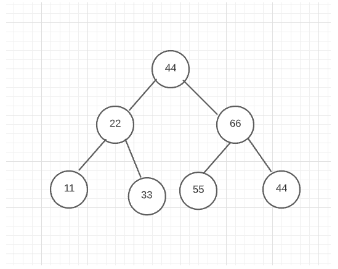

Como podemos ver, el nodo raíz es 44, y los valores más pequeños con respecto al valor raíz se colocan en el subárbol izquierdo, y los valores más grandes con respecto al valor raíz se colocan en el subárbol derecho. 

Ahora, vamos a comprobar cuántos árboles de búsqueda binarios se pueden hacer utilizando las claves que hemos tomado en nuestro ejemplo:

La fórmula para ello es

2n C n / n+1 

Por lo tanto, el número total de árboles de búsqueda binarios que se pueden crear con las claves mencionadas es de 5. 

 

Ahora bien, para calcular el costo de la operación dependerá de cuántas comparaciones se necesiten hacer, así que lo encontraremos por el siguiente método:

Como podemos ver en el árbol mencionado anteriormente, necesitaremos hacer 3 comparaciones, por lo que el promedio de comparaciones será:

1+2+3/3 = 2. 

Similarmente, 

Encontraremos las comparaciones para varias otras formas de BST usando las mismas claves. 

Después de haber hecho las comparaciones, vemos que el árbol mencionado a continuación tiene el menor número de comparaciones y, por lo tanto, el menor costo, y califica como un árbol de búsqueda binaria balanceada o árbol de búsqueda binaria óptima. 

In [5]:
import random
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

null_node = 0

def generar_bst(T,a):

    global null_node
    if len(a)==1: 
      T.add_node(a[0])
      return a[0]
    else:
      pivote = random.randint(0,len(a)-1)
      T.add_node(a[pivote])

      if pivote > 0:
        left_node = generar_bst(T,a[0:pivote])
        T.add_edge(a[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(a[pivote],"nil"+str(null_node)); null_node += 1
      
      if pivote < len(a)-1:
        right_node = generar_bst(T,a[pivote+1:])
        T.add_edge(a[pivote],right_node)
      else: 
        T.add_edge(a[pivote],"nil"+str(null_node)); null_node +=1

      return a[pivote]

In [11]:
def insertionSort(arr,a):
  
    # Traverse through 1 to len(arr)
    for i in range(1, len(arr)):
  
        key = arr[i]
        key2 = a[i]
        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        j = i-1
        while j >= 0 and key < arr[j] :
                arr[j + 1] = arr[j]
                a[j + 1] = a[j]
                j -= 1
        arr[j + 1] = key
        a[j + 1] = key2
  

In [14]:
#RECURSIVO
def optimalSearchTree(keys, freq, n,visualize=False):

    insertionSort(keys,freq)
    return optCost(freq, 0, n - 1,visualize)
 
# A recursive function to calculate
# cost of optimal binary search tree
def optCost(freq, i, j,visualize=False):
    
    global cont
    # Base cases
    if j < i:     # no elements in this subarray
        return 0
    if j == i:     # one element in this subarray
        return freq[i]
     
    # Get sum of freq[i], freq[i+1], ... freq[j]
    fsum = Sum(freq, i, j)
     
    # Initialize minimum value
    Min = 999999999999
     
    # One by one consider all elements as
    # root and recursively find cost of
    # the BST, compare the cost with min
    # and update min if needed
    for r in range(i, j + 1):
        cost = (optCost(freq, i, r - 1) +
                optCost(freq, r + 1, j))
        cont+=1
        
        if cost < Min:
            Min = cost
     
    # Return minimum value
    if (visualize==True):
      T = nx.DiGraph()
      generar_bst(T,keys)
      pos = graphviz_layout(T, prog="dot")
      nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width= 1.0, edge_color ="red")
      null_node = 0

    return Min + fsum
def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

Cost of Optimal BST is 142
llamadas recursivas 7


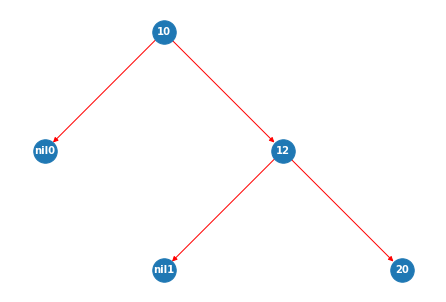

In [15]:
keys = [10, 12, 20]
freq = [34, 8, 50]
n = len(keys)
cont=0
print("Cost of Optimal BST is",optimalSearchTree(keys, freq, n,True))
print("llamadas recursivas",cont)



Cost of Optimal BST is 353


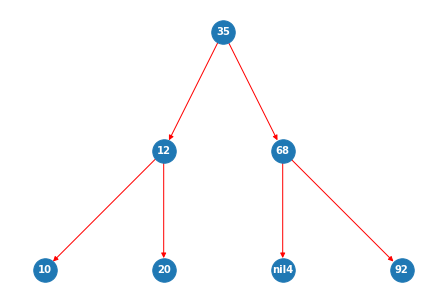

In [36]:
keys = [10, 12, 20,35,68,92]
freq = [34, 8, 50,4,25,60]
n = len(keys)
print("Cost of Optimal BST is",optimalSearchTreeDi(keys, freq, n,True))

# Complejidad temporal

función matemática para describir la cantidad de subproblemas que se deben resolver en función del tamaño de entrada
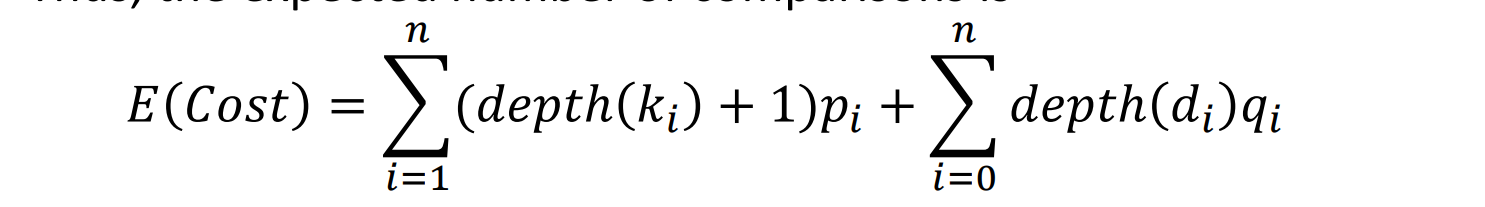

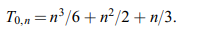


Cada subproblema posee un tiempo de ejecucion de O(n^k+2) y el algoritmo posee un tiempo de ejecucion de 𝑂(𝑛^3), ya que necesitamos calcular 𝑂(𝑛^2) entradas y nosotros
necesita 𝑂(𝑛) tiempo para calcular cada entrada.

# Complejidad espacial
la complejidad espacial en la solución dinámica es O(n^2), ya que necesitamos almacenar O(n^2) valores en 3 matrices para un par de índices i, j donde

𝑗 ≥ 𝑖 − 1.



La solución recursiva no necesita ni almacena información extra a a medida que va resolviendo subproblemas, por lo que su complejidad espacial es de O(1)

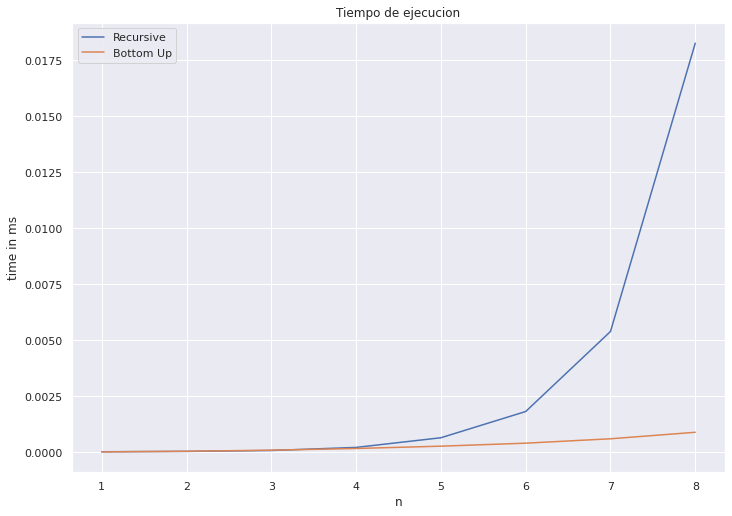

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from timeit import repeat
import numpy as np

%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='dark')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Tiempo

x=[]; x2=[]
y=[]; y2=[]

for n in range(1,9):
  keys, p= optimal_bst_instance_generator(n)

  t = repeat(setup="from __main__ import optimalSearchTree", stmt=f"optimalSearchTree({keys},{p}, {n})", repeat=1, number=10)
  
  x.append(n)
  y.append(t)

  t = repeat(setup="from __main__ import optimalSearchTreeDi", stmt=f"optimalSearchTreeDi({keys},{p},{n})", repeat=1, number=10)
  
  x2.append(n)
  y2.append(t)

  
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Recursive", "Bottom Up"])
plt.title("Tiempo de ejecucion")

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Como se puede apreciar en el gráfico anterior la solución recursiva posee un mayor tiempo de ejecución que la solución dinámica aunque como era de esperarse en ambos caso el tiempo de ejecución aumenta a medida que el tamaño de los arreglos aumenta